<a href="https://colab.research.google.com/github/vieirafrancisco/PI/blob/main/Transforma%C3%A7%C3%B5es_Morfol%C3%B3gicas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>Processamento de Imagens</center></h1>
<p><center>Transformações Morfológicas</center></p>

### Descrição:  
O objetivo deste trabalho é selecionar uma imagem e tentar remover o fundo dela utilizando transformações morfológicas. Semelhante ao que foi feito neste [link](https://stackoverflow.com/questions/64491530/how-to-remove-the-background-from-a-picture-in-opencv-python) !

In [1]:
import os
from google.colab import drive
drive.mount('/drive/')

Mounted at /drive/


In [6]:
os.chdir('/drive/My Drive/UFAL/PI')

In [9]:
import cv2 as cv 
from skimage import io
from google.colab.patches import cv2_imshow
import numpy as np
from matplotlib import pyplot as plt

In [283]:
# Imagens que utilizei para fazer meus experimentos
img1 = cv.cvtColor(io.imread("suco.jpg"), cv.COLOR_RGBA2GRAY)
img2 = cv.cvtColor(io.imread("spiderman.jpg"), cv.COLOR_RGBA2GRAY)
img3 = cv.cvtColor(io.imread("spiderman2.jpg"), cv.COLOR_RGBA2GRAY)

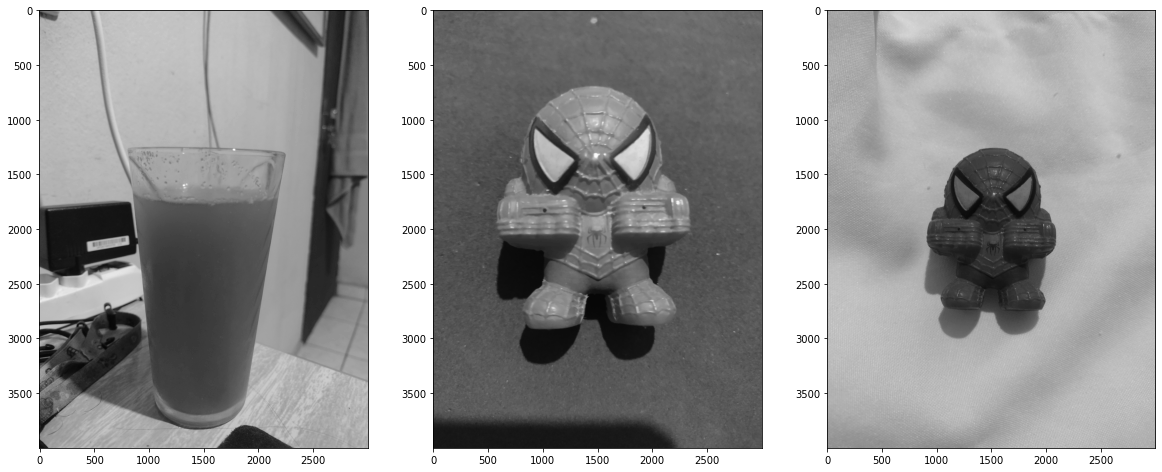

In [284]:
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(1,3,1)
ax1.imshow(img1, cmap="gray")
ax2 = fig.add_subplot(1,3,2)
ax2.imshow(img2, cmap="gray")
ax3 = fig.add_subplot(1,3,3)
ax3.imshow(img3, cmap="gray")

plt.show()

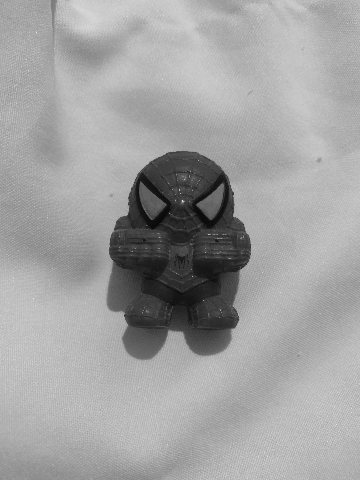

In [285]:
# Imagem 3 selecionada
img = img3
img = cv.resize(img, None, fx=.12, fy=.12)
cv2_imshow(img)

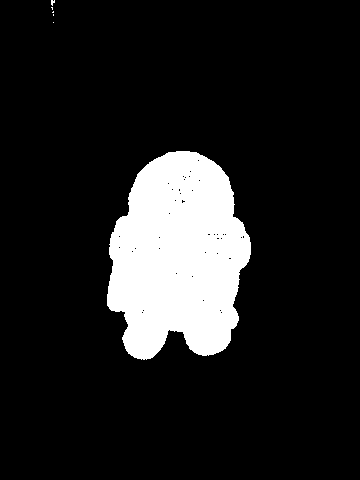

In [293]:
# Tentativa de binarização direto da imagem de origem.
# Utilizando um treshold global invertido
ret, b_img = cv.threshold(img,127,255,cv.THRESH_BINARY_INV)
cv2_imshow(b_img)

In [192]:
# Como o resultado da anterior não foi legal, resolvi tentar utilizar um threshold
# que substitui os pixels abaixo deste threshold pelo valor do threshold
ret, binary_img = cv.threshold(img,80,255,cv.THRESH_TRUNC)

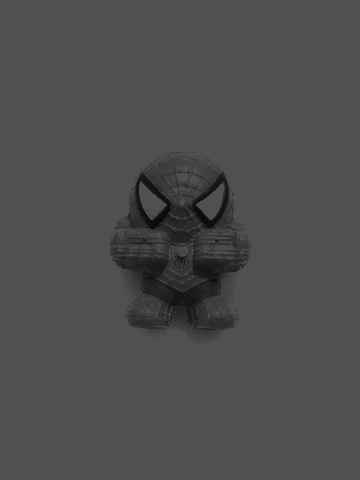

In [190]:
cv2_imshow(binary_img)

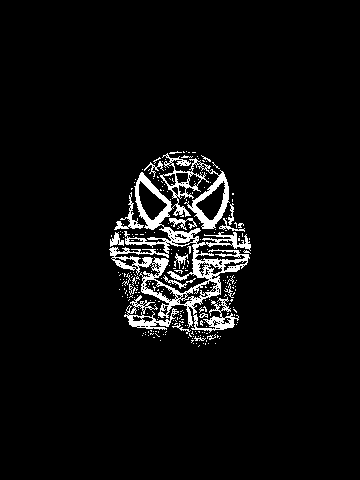

In [198]:
# Posteriomente, tentei calcular o threshold utilizando a média móvel e o resulto foi agradável!
# Somente a parte onde fica a sombra que manteve um ruído
at_img = cv.adaptiveThreshold(binary_img,255,cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY_INV,11,2)
cv2_imshow(at_img)

In [302]:
# Elemento Estruturante
# Escolhi ELLIPSE para tentar suavizar as bordas
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE,(2,2))
kernel

array([[0, 1],
       [1, 1]], dtype=uint8)

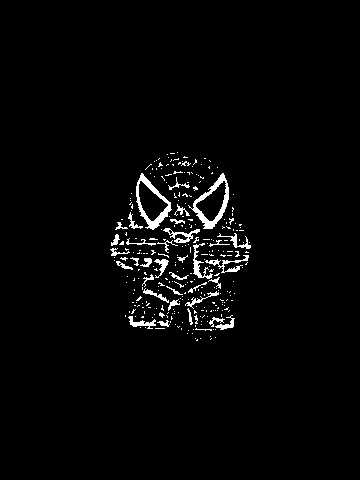

In [303]:
# Apliquei erosão para remover um pouco dos pontos brancos da sombra
erode = cv.erode(at_img, kernel,iterations=1)
cv2_imshow(erode)

In [304]:
# Apliquei abertura: erosão seguido de dilatação
opening = cv.morphologyEx(erode, cv.MORPH_CLOSE, kernel)
inv_img = 255 - opening

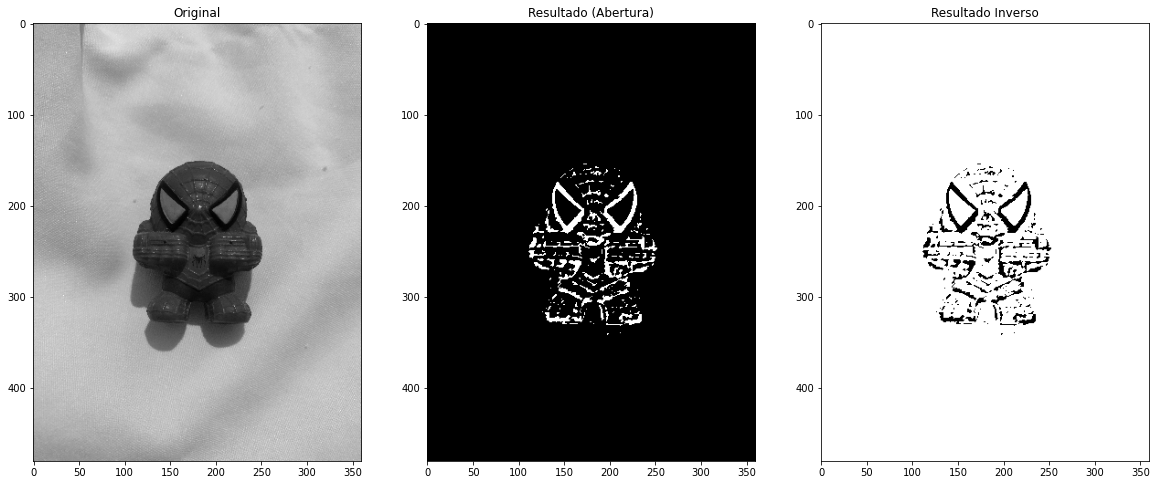

In [306]:
# Resultados
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(1,3,1)
ax1.imshow(img, cmap="gray")
ax2 = fig.add_subplot(1,3,2)
ax2.imshow(opening, cmap="gray")
ax3 = fig.add_subplot(1,3,3)
ax3.imshow(inv_img, cmap="gray")

ax1.title.set_text('Original')
ax2.title.set_text('Resultado (Abertura)')
ax3.title.set_text('Resultado Inverso')

plt.show()